In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib




# Example 1: Post-synaptic response of a single synapse #
This is an example of **``LFPy``** running in an **``IPython notebook``**. To run through this example code and produce output, press **``<shift-Enter>``** in each code block below.

First step is to **import ``LFPy``** and other packages for analysis and plotting:

In [2]:
import LFPy

Then, create the cell object using the **LFPy.Cell**
-class, specifying the morphology file.
The passive mechanisms
are not switched on by default.

In [3]:
cell = LFPy.Cell(morphology = 'morphologies/L5_Mainen96_LFPy.hoc', passive=True)

One can now use **LFPy.Synapse**-class to insert a single 
synapse onto the soma compartment, and set the spike time(s) using **LFPy.Synapse.set_spike_times()**:

In [4]:
synapse = LFPy.Synapse(cell, 
                       idx = cell.get_idx("soma[0]"),
                       syntype = 'Exp2Syn', 
                       weight = 0.005, 
                       e = 0, 
                       tau1 = 0.5,
                       tau2 = 2,
                       record_current = True)
synapse.set_spike_times(array([20., 40]))


We now have what we need to calculate the postsynaptic response, without calculating LFPs,
using a built in method **LFPy.Cell.simulate()** method to run the simulation.

In [5]:
cell.simulate()

Then 
plot the model geometry, synaptic current and somatic potential:

[-500, 500, -400, 1200]

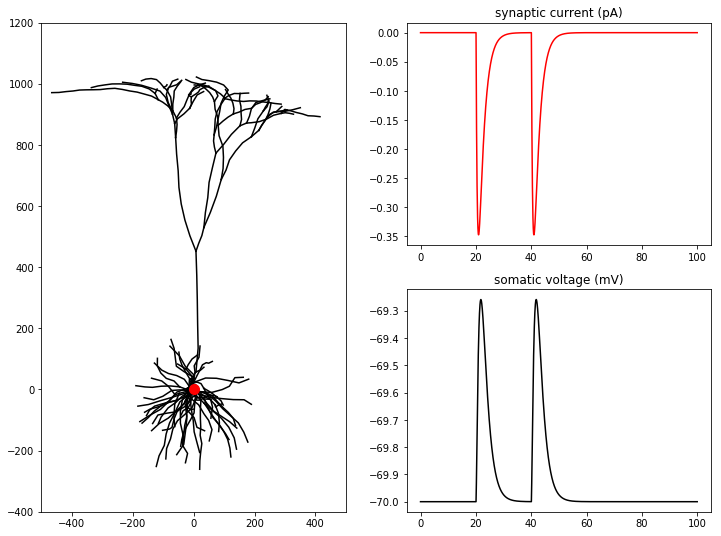

In [6]:
figure(figsize=(12, 9))
subplot(222)
plot(cell.tvec, synapse.i, 'r'), title('synaptic current (pA)')
subplot(224)
plot(cell.tvec, cell.somav, 'k'), title('somatic voltage (mV)')
subplot(121)
for sec in LFPy.cell.neuron.h.allsec():
    idx = cell.get_idx(sec.name())
    plot(np.r_[cell.xstart[idx], cell.xend[idx][-1]],
            np.r_[cell.zstart[idx], cell.zend[idx][-1]],
            color='k')
plot([cell.synapses[0].x], [cell.synapses[0].z], \
     color='r', marker='o', markersize=10)
axis([-500, 500, -400, 1200])

#savefig('LFPy-example-1.pdf', dpi=200)